## Scenario

I am a junior data analyst working on the marketing analyst team at Cyclistic, a bike-share company in Chicago.The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, my team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve my recommendations.




## Introduction

Welcome to the Cyclistic bike-share analysis case study! In this case study, I work for a fictional company, Cyclistic, along with some key team members. In order to answer the business questions, follow the steps of the data analysis process: 
1. Ask
2. Prepare
3. Process
4. Analyze
5. Share
6. Act.

## Characters and teams

● Cyclistic: A bike-share program that features more than 5,800 bicycles and 600
docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand
tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities
and riders who can’t use a standard two-wheeled bike. The majority of riders opt for
traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more
likely to ride for leisure, but about 30% use the bikes to commute to work each day.

● Lily Moreno: The director of marketing and your manager. Moreno is responsible for
the development of campaigns and initiatives to promote the bike-share program.
These may include email, social media, and other channels.

● Cyclistic marketing analytics team: A team of data analysts who are responsible for
collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy.
You joined this team six months ago and have been busy learning about Cyclistic’s
mission and business goals—as well as how you, as a junior data analyst, can help
Cyclistic achieve them.

● Cyclistic executive team: The notoriously detail-oriented executive team will decide
whether to approve the recommended marketing program.



## About the company

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown
to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations
across Chicago. The bikes can be unlocked from one station and returned to any other station
in the system anytime.
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to
broad consumer segments. One approach that helped make these things possible was the
flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships.
Customers who purchase single-ride or full-day passes are referred to as casual riders.
Customers who purchase annual memberships are Cyclistic members.
Cyclistic’s finance analysts have concluded that annual members are much more profitable
than casual riders. Although the pricing flexibility helps Cyclistic attract more customers,
Moreno believes that maximizing the number of annual members will be key to future growth.
Rather than creating a marketing campaign that targets all-new customers, Moreno believes
there is a solid opportunity to convert casual riders into members. She notes that casual riders
are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.
Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into
annual members. In order to do that, however, the team needs to better understand how
annual members and casual riders differ, why casual riders would buy a membership, and how
digital media could affect their marketing tactics. Moreno and her team are interested in
analyzing the Cyclistic historical bike trip data to identify trends.

## Environment Setup:

In [1]:
library(tidyverse)
library(tidyr)
library(dplyr)
library(readr)
library(magrittr)
library(lubridate)
library(corrplot)
library(ggplot2)
library(here)
library(skimr)
library(janitor)
library(geosphere)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


corrplot 0.92 loaded

here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




## Importing datasets

In [2]:
april_2021 <- read.csv("../input/bike-trips/202104-divvy-tripdata.csv")
may_2021 <- read.csv("../input/bike-trips/202105-divvy-tripdata.csv")
june_2021 <- read.csv("../input/bike-trips/202106-divvy-tripdata.csv")
july_2021 <- read.csv("../input/bike-trips/202107-divvy-tripdata.csv")
august_2021 <- read.csv("../input/bike-trips/202108-divvy-tripdata.csv")
september_2021 <- read.csv("../input/bike-trips/202109-divvy-tripdata.csv")
october_2021 <- read.csv("../input/bike-trips/202110-divvy-tripdata.csv")
november_2021 <- read.csv("../input/bike-trips/202111-divvy-tripdata.csv")
december_2021 <- read.csv("../input/bike-trips/202112-divvy-tripdata.csv")
january_2022 <- read.csv("../input/bike-trips/202201-divvy-tripdata.csv")
february_2022 <- read.csv("../input/bike-trips/202202-divvy-tripdata.csv")
march_2022 <- read.csv("../input/bike-trips/202203-divvy-tripdata.csv")

# finding the number of distinct ID's present in the datasets;

In [3]:

n_distinct(april_2021$ride_id)
n_distinct(may_2021$ride_id)
n_distinct(june_2021$ride_id)
n_distinct(july_2021$ride_id)
n_distinct(august_2021$ride_id)
n_distinct(september_2021$ride_id)
n_distinct(october_2021$ride_id)
n_distinct(november_2021$ride_id)
n_distinct(december_2021$ride_id)
n_distinct(january_2022$ride_id)
n_distinct(february_2022$ride_id)
n_distinct(march_2022$ride_id)

[1] 337230

[1] 531633

[1] 729595

[1] 822410

[1] 804352

[1] 756147

[1] 631226

[1] 359978

[1] 247540

[1] 103770

[1] 115609

[1] 284042

# finding if there are any NA values present in the datasets;

In [4]:
sum(is.na(april_2021))
sum(is.na(may_2021))
sum(is.na(june_2021))
sum(is.na(july_2021))
sum(is.na(august_2021))
sum(is.na(september_2021))
sum(is.na(october_2021))
sum(is.na(november_2021))
sum(is.na(december_2021))
sum(is.na(january_2022))
sum(is.na(february_2022))
sum(is.na(march_2022))

[1] 534

[1] 904

[1] 1434

[1] 1462

[1] 1412

[1] 1190

[1] 968

[1] 382

[1] 288

[1] 172

[1] 154

[1] 532

# Removing the NA values present in the datasets;

In [5]:

ap_2021 <- april_2021 %>% 
  select(ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual) %>% 
  drop_na()

sum(is.na(ap_2021))

my_2021 <- may_2021 %>% 
  select(ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual) %>% 
  drop_na()

sum(is.na(my_2021))

jun_2021 <- june_2021 %>% 
  select(ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual) %>% 
  drop_na()

sum(is.na(jun_2021))

jul_2021 <- july_2021 %>% 
  select(ride_id,rideable_type,start_station_name,end_station_name,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual) %>% 
  drop_na()

sum(is.na(jul_2021))

aug_2021 <- august_2021 %>% 
  select(ride_id,rideable_type,start_station_name,end_station_name,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual) %>% 
  drop_na()

sum(is.na(aug_2021))

sep_2021 <- september_2021 %>% 
  select(ride_id,rideable_type,start_station_name,end_station_name,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual) %>% 
  drop_na()

sum(is.na(sep_2021))

oct_2021 <- october_2021 %>% 
  select(ride_id,rideable_type,start_station_name,end_station_name,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual) %>% 
  drop_na()

sum(is.na(oct_2021))

novem_2021 <- november_2021 %>% 
  select(ride_id,rideable_type,start_station_name,end_station_name,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual) %>% 
  drop_na()

sum(is.na(novem_2021))

decem_2021 <- december_2021 %>% 
  select(ride_id,rideable_type,start_station_name,end_station_name,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual) %>% 
  drop_na()

sum(is.na(decem_2021))

jan_2022 <- january_2022 %>% 
  select(ride_id,rideable_type,start_station_name,end_station_name,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual) %>% 
  drop_na()

sum(is.na(jan_2022))

feb_2022 <- february_2022 %>% 
  select(ride_id,rideable_type,start_station_name,end_station_name,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual) %>% 
  drop_na()

sum(is.na(feb_2022))

mar_2022 <- march_2022 %>% 
  select(ride_id,rideable_type,start_station_name,end_station_name,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual) %>% 
  drop_na()

sum(is.na(mar_2022))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

# checking for duplicates;

In [6]:

sum(duplicated(ap_2021))
sum(duplicated(my_2021))
sum(duplicated(jun_2021))
sum(duplicated(jul_2021))
sum(duplicated(aug_2021))
sum(duplicated(sep_2021))
sum(duplicated(oct_2021))
sum(duplicated(novem_2021))
sum(duplicated(decem_2021))
sum(duplicated(jan_2022))
sum(duplicated(feb_2022))
sum(duplicated(mar_2022))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

## Process

First, were going to merge all of the trips datasets together.

In [7]:
# Merge the datasets

trips <- bind_rows(ap_2021,my_2021,jun_2021,jul_2021,aug_2021,sep_2021,oct_2021,novem_2021,decem_2021,jan_2022,feb_2022,mar_2022)

Now that we have all of the datasets in one single dataframe, the following steps are taken to clean, aggregate, and mutate the data fro analysis.

In [8]:
# Creating month column
trips$month <- format(as.Date(trips$started_at), "%b")

# Creating year column
trips$year <- format(as.Date(trips$started_at), "%Y") 

# Creating day of the week column
trips$day_of_week <- format(as.Date(trips$started_at), "%A") 

# Creating hour column
trips <- trips %>%
    mutate(hour = strftime(trips$ended_at, "%H"))
# Creating ride length column (in minutes)
trips$ride_length <- (as.double(difftime(trips$ended_at, trips$started_at))) /60

# Creating ride distance column (in km)
trips$ride_distance <- distGeo(matrix(c(trips$start_lng, trips$start_lat), ncol = 2),
                              matrix(c(trips$end_lng, trips$end_lat), ncol = 2))

trips$ride_distance <- trips$ride_distance/1000

# Ordering day_of_week column
trips$day_of_week <- ordered(trips$day_of_week, levels = c("Monday", "Tuesday", "Wednesday", 
                                                           "Thursday", "Friday", "Saturday", 
                                                           "Sunday"))
# Ordering month column
trips$month <- ordered(trips$month, levels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"))

# Renaming columns
names(trips) [2] <- 'bike'
names(trips) [13] <- 'user'

# Remove rows with NA's
trips <- drop_na(trips)

# Remove rows where rides were negative
trips <- trips[!trips$ride_length < 1,]

# Remove rows where rides were above 1 day
trips <- trips[!trips$ride_length > 1440,]

## Analyze

In [9]:
usercount <- trips %>%
    group_by(user) %>%
    summarize(total = n()) %>%
    mutate(overall_total = sum(total)) %>%
    group_by(user) %>%
    summarize(percent_total = total/overall_total)

usercount

user,percent_total
<chr>,<dbl>
2021,0.91233446
2022,0.08766554


Over the past twelve months, 91% of Cyclistic rides were from an annual member.

In [10]:
bike_usage <- trips %>%
    group_by(bike) %>%
    summarize(total = n()) %>%
    mutate(overall_total = sum(total)) %>%
    group_by(bike) %>%
    summarize(percent_total = total/overall_total) 

bike_usage

bike,percent_total
<chr>,<dbl>
classic_bike,0.56924081
docked_bike,0.05338849
electric_bike,0.37737070


In [11]:
riders_time_user <- trips %>%
    group_by(user) %>%
    summarize(avg_time = mean(ride_length), .groups = "drop")


riders_time_user$avg_time <- round(riders_time_user$avg_time , digits = 0)

riders_time_user

user,avg_time
<chr>,<dbl>
2021,20
2022,15


In [12]:
riders_time_biketypes <- trips %>%
    group_by(bike, user) %>%
    summarize(avg_time = mean(ride_length), .groups = "drop")

riders_time_biketypes$avg_time <- round(riders_time_biketypes$avg_time , digits = 0)

riders_time_biketypes

bike,user,avg_time
<chr>,<chr>,<dbl>
classic_bike,2021,19
classic_bike,2022,15
docked_bike,2021,50
docked_bike,2022,46
electric_bike,2021,16
electric_bike,2022,13


In [13]:
riders_dist_user <- trips %>%
    group_by(user) %>%
    summarize(avg_dist = mean(ride_distance), .groups = "drop")

riders_dist_user$avg_dist <- round(riders_dist_user$avg_dist , digits = 2)

riders_dist_user

user,avg_dist
<chr>,<dbl>
2021,2.23
2022,1.97


In [14]:
riders_dist_biketypes <- trips %>%
    group_by(bike, user) %>%
    summarize(avg_dist = mean(ride_distance), .groups = "drop")

riders_dist_biketypes$avg_dist <- round(riders_dist_biketypes$avg_dist , digits = 2)

riders_dist_biketypes

bike,user,avg_dist
<chr>,<chr>,<dbl>
classic_bike,2021,2.09
classic_bike,2022,1.78
docked_bike,2021,2.04
docked_bike,2022,1.99
electric_bike,2021,2.48
electric_bike,2022,2.18


In [15]:
# Average ride time by user
avgridetime <- trips %>% 
    group_by(user) %>%
    summarise(avgtime = mean(ride_length))

avgridetime$avgtime <- round(avgridetime$avgtime, digits = 0)

avgridetime

user,avgtime
<chr>,<dbl>
2021,20
2022,15


In [16]:
# Average ride distance by user
avgridedist <- trips %>%
    group_by(user) %>%
    summarise(avgdist = mean(ride_distance))

avgridedist$avgdist <- round(avgridedist$avgdist, digits = 3)

avgridedist

user,avgdist
<chr>,<dbl>
2021,2.230
2022,1.974


In [17]:
# Rides by user, hour
hour <- trips %>%
    group_by(user, hour) %>% 
    summarise(numberofrides = n(),.groups = 'drop') %>% 
      arrange(hour)

hour

user,hour,numberofrides
<chr>,<chr>,<int>
2021,00,91305
2022,00,4807
2021,01,64291
2022,01,3104
2021,02,43674
2022,02,2280
2021,03,24031
2022,03,1430
2021,04,17827


In [18]:
# Ride count by user, weekday
dayofweek <- trips %>%
      group_by(user, day_of_week) %>% 
      summarise(numberofrides = n(),.groups = "drop")

dayofweek

user,day_of_week,numberofrides
<chr>,<ord>,<int>
2021,Monday,639435
2021,Tuesday,675884
2021,Wednesday,692277
2021,Thursday,683863
2021,Friday,748813
2021,Saturday,903940
2021,Sunday,790587
2022,Monday,80883
2022,Tuesday,78335


In [19]:
# Ride count by user, month
month <- trips %>% 
    group_by(user, month) %>% 
    summarise(numberofrides = n(),.groups = "drop")

month

user,month,numberofrides
<chr>,<ord>,<int>
2021,Apr,332043
2021,May,522573
2021,Jun,716728
2021,Jul,808834
2021,Aug,792133
2021,Sep,744489
2021,Oct,620714
2021,Nov,353840
2021,Dec,243445


## Share

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


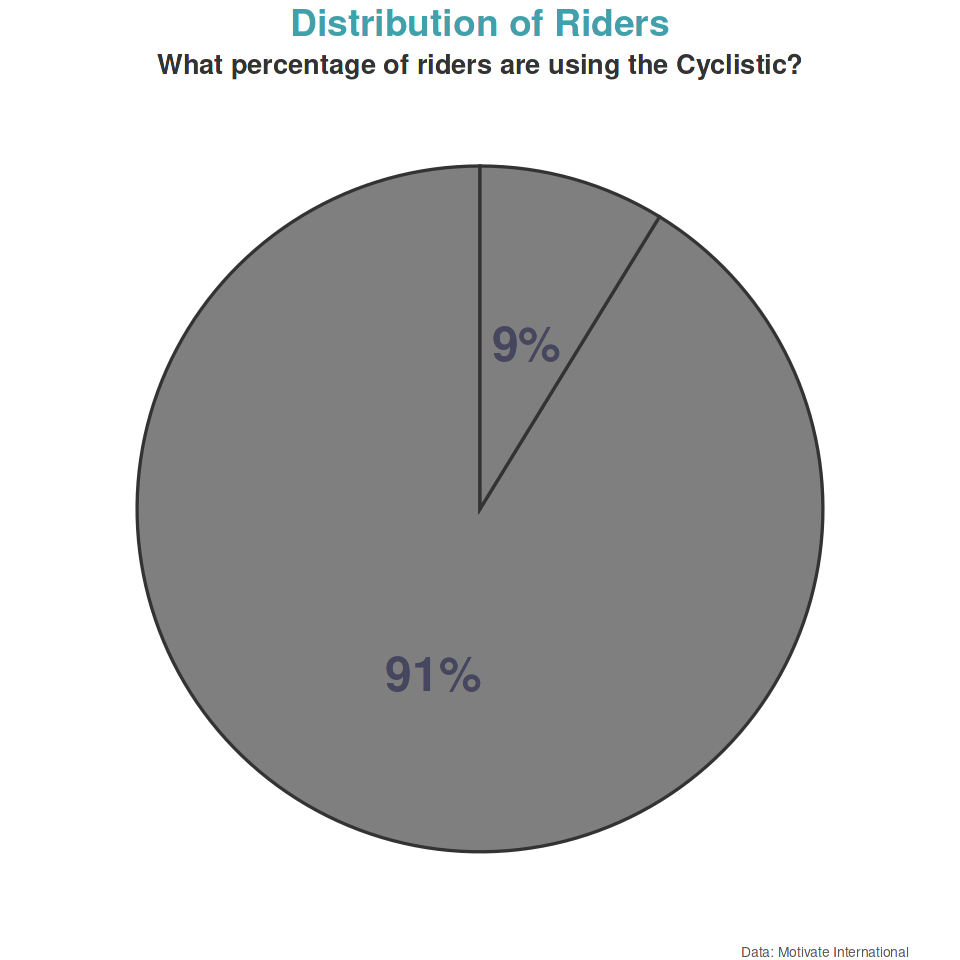

In [20]:
# 1
options(repr.plot.width = 8, repr.plot.height = 8)

ggplot(usercount, aes(x = "", y = percent_total, fill = user)) +
    geom_col(color = "grey20", size = 0.7) +
    coord_polar("y", start = 0) +
    geom_text(aes(label = scales :: percent(percent_total)), position = position_stack(vjust = 0.5), size = 10, fontface = "bold", color = "#46465e") +
scale_fill_manual(values = c("#91d8e0", "#42a0ab"), name = "Types of riders", breaks = c("casual", "member"), labels = c("Casual Member", "Annual Member")) +
labs(title = "Distribution of Riders", subtitle = "What percentage of riders are using the Cyclistic?",
    caption = "Data: Motivate International") +
theme_void() +
theme(plot.title = element_text(hjust = 0.5, size = 22, face = "bold", color = "#42a0ab"),
    plot.subtitle = element_text(hjust = 0.5, size = 16, face = "bold", color = "grey20"),
    plot.caption = element_text(size = 8, color = "grey35"),
    legend.title = element_text(size = 16, face = "bold", color = "#42a0ab"),
    legend.text = element_text(size = 14, color = "grey20"))

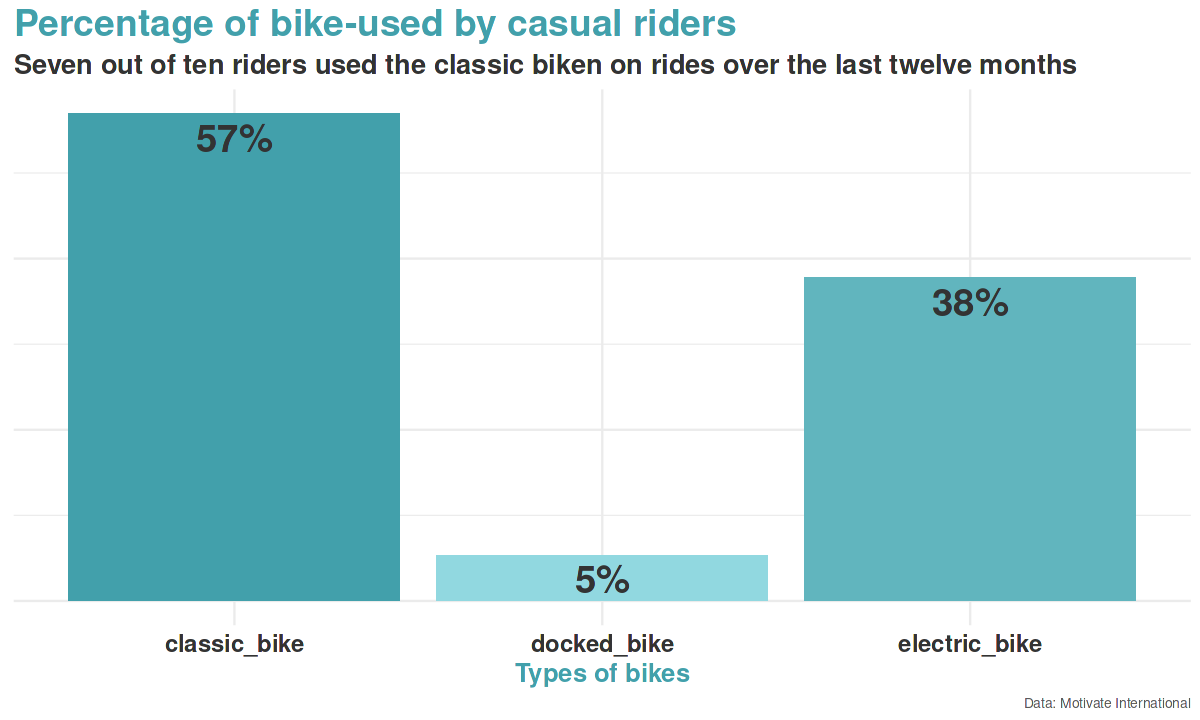

In [21]:
# 2
options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(bike_usage, aes(x = bike, y = percent_total, fill = percent_total)) + 
    geom_bar(stat = "identity") +
    geom_text(aes(label = scales :: percent(percent_total)), vjust = 1.35, size = 8, fontface = "bold", color = "grey20") + 
scale_fill_gradient(high = "#42a0ab", low = "#91d8e0") +
    labs(title = "Percentage of bike-used by casual riders", subtitle = "Seven out of ten riders used the classic biken on rides over the last twelve months",
         caption = "Data: Motivate International", x = "Types of bikes", y = "") +
theme_minimal() +
 theme(plot.title = element_text(size = 22, color = "#42a0ab", face = "bold"), 
    plot.subtitle = element_text(size = 16, color = "grey20", face = "bold"), 
    plot.caption = element_text(size = 8, color = "grey35"),
    axis.text.x = element_text(size = 14, color = "grey20", face = "bold"),
    axis.text.y = element_blank(),
    axis.title.x = element_text(size = 15, color = "#42a0ab", face = "bold"), 
    axis.title.y = element_blank(),
    legend.position = "none")

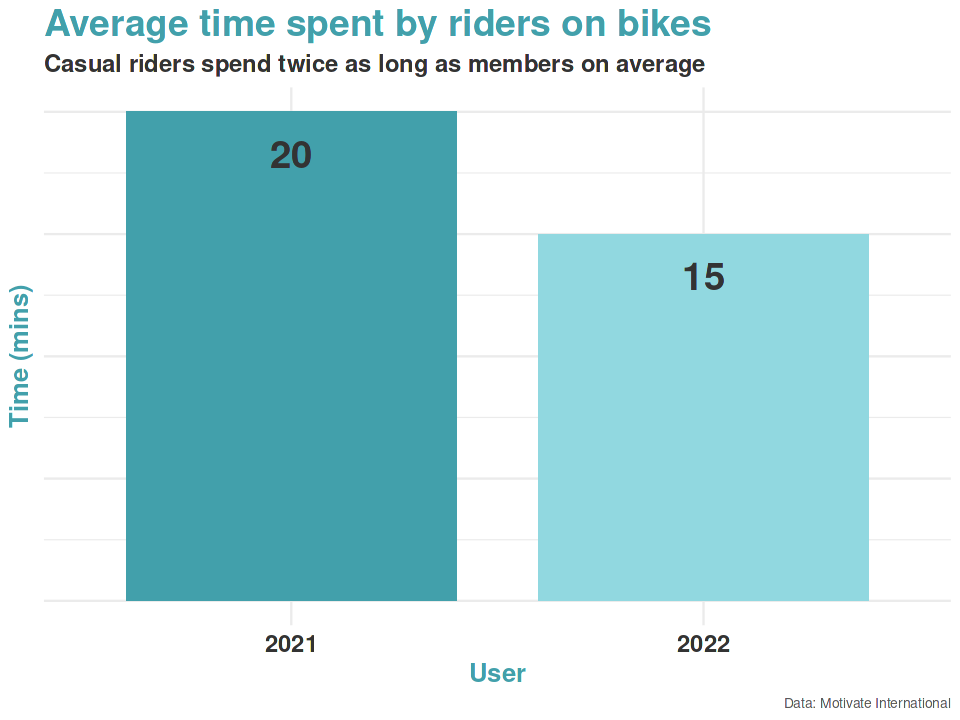

In [22]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(riders_time_user, aes(x = user, y = avg_time, fill = avg_time)) +
    geom_col(width = 0.8) + 
    geom_text(aes(label = avg_time), vjust = 2, size = 8, color = "grey20", fontface = "bold") +
scale_fill_gradient(high = "#42a0ab", low = "#91d8e0") +
    labs(title = "Average time spent by riders on bikes", subtitle = "Casual riders spend twice as long as members on average",
        caption = "Data: Motivate International", x = "User", y = "Time (mins)") +
theme_minimal() +
    theme(plot.title = element_text(size = 22, color = "#42a0ab", face = "bold"), 
    plot.subtitle = element_text(size = 14, color = "grey20", face = "bold"), 
    plot.caption = element_text(size = 8, color = "grey35"),
    axis.title.x = element_text(size = 15, color = "#42a0ab", face = "bold"), 
    axis.title.y = element_text(size = 15, color = "#42a0ab", face = "bold"), 
    axis.text.x = element_text(size = 14, color = "grey20", face = "bold"),
    axis.text.y = element_blank(),
    legend.position = "none")

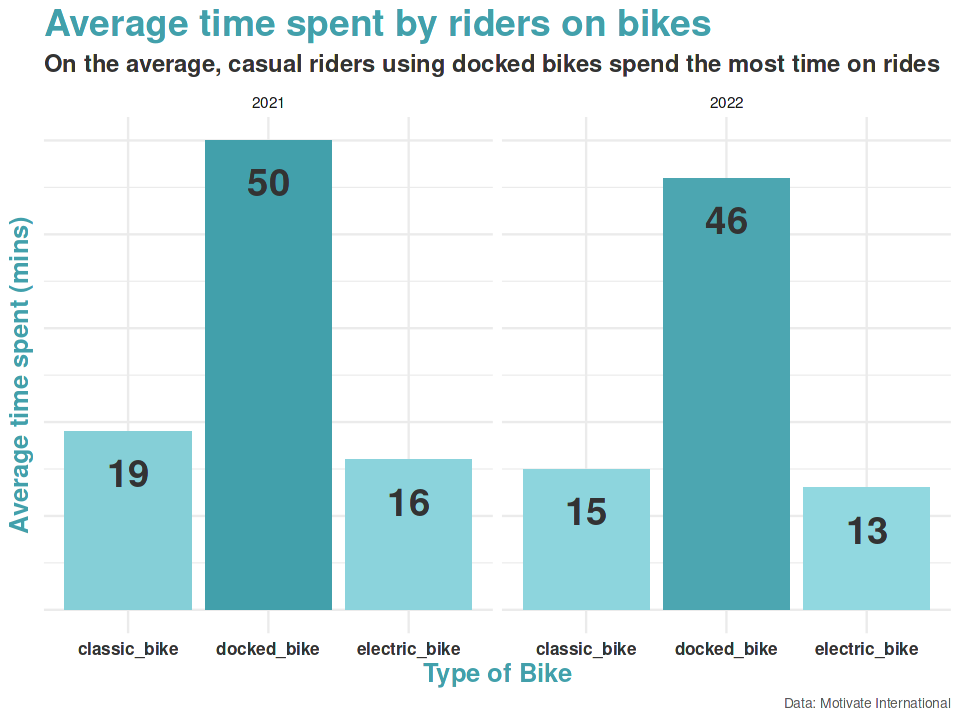

In [23]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(riders_time_biketypes, aes(x = bike, y = avg_time, fill = avg_time)) +
    geom_col() + 
    geom_text(aes(label = avg_time), vjust = 2, size = 8, color = "grey20", fontface = "bold") +
scale_fill_gradient(high = "#42a0ab", low = "#91d8e0") +
facet_wrap(~user) +
    labs(title = "Average time spent by riders on bikes", subtitle = "On the average, casual riders using docked bikes spend the most time on rides",
        caption = "Data: Motivate International", x = "Type of Bike", y = "Average time spent (mins)") +
theme_minimal() +
    theme(plot.title = element_text(size = 22, color = "#42a0ab", face = "bold"), 
    plot.subtitle = element_text(size = 14, color = "grey20", face = "bold"), 
    plot.caption = element_text(size = 8, color = "grey35"),
    axis.title.x = element_text(size = 15, color = "#42a0ab", face = "bold"), 
    axis.title.y = element_text(size = 15, color = "#42a0ab", face = "bold"), 
    axis.text.x = element_text(size = 10, color = "grey20", face = "bold"),
    axis.text.y = element_blank(),
    legend.position = "none")

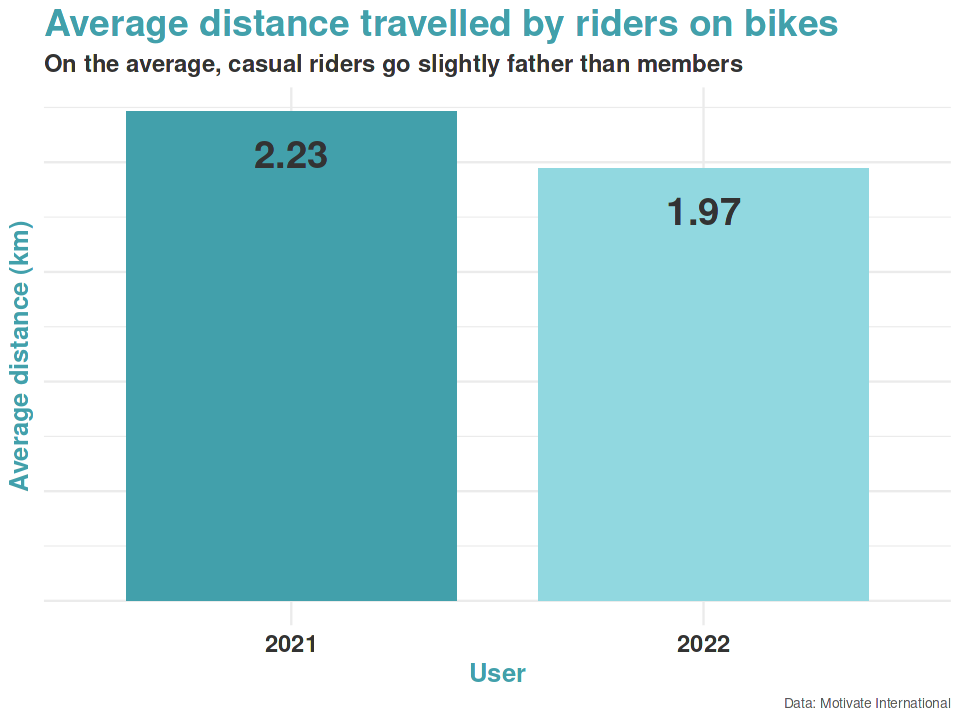

In [24]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(riders_dist_user, aes(x = user, y = avg_dist, fill = avg_dist)) +
    geom_col(width = 0.8) + 
    geom_text(aes(label = avg_dist), vjust = 2, size = 8, color = "grey20", fontface = "bold") +
scale_fill_gradient(high = "#42a0ab", low = "#91d8e0") +
    labs(title = "Average distance travelled by riders on bikes", subtitle = "On the average, casual riders go slightly father than members",
        caption = "Data: Motivate International", x = "User", y = "Average distance (km)") +
theme_minimal() +
    theme(plot.title = element_text(size = 22, color = "#42a0ab", face = "bold"), 
    plot.subtitle = element_text(size = 14, color = "grey20", face = "bold"), 
    plot.caption = element_text(size = 8, color = "grey35"),
    axis.title.x = element_text(size = 15, color = "#42a0ab", face = "bold"), 
    axis.title.y = element_text(size = 15, color = "#42a0ab", face = "bold"), 
    axis.text.x = element_text(size = 14, color = "grey20", face = "bold"),
    axis.text.y = element_blank(),
    legend.position = "none")

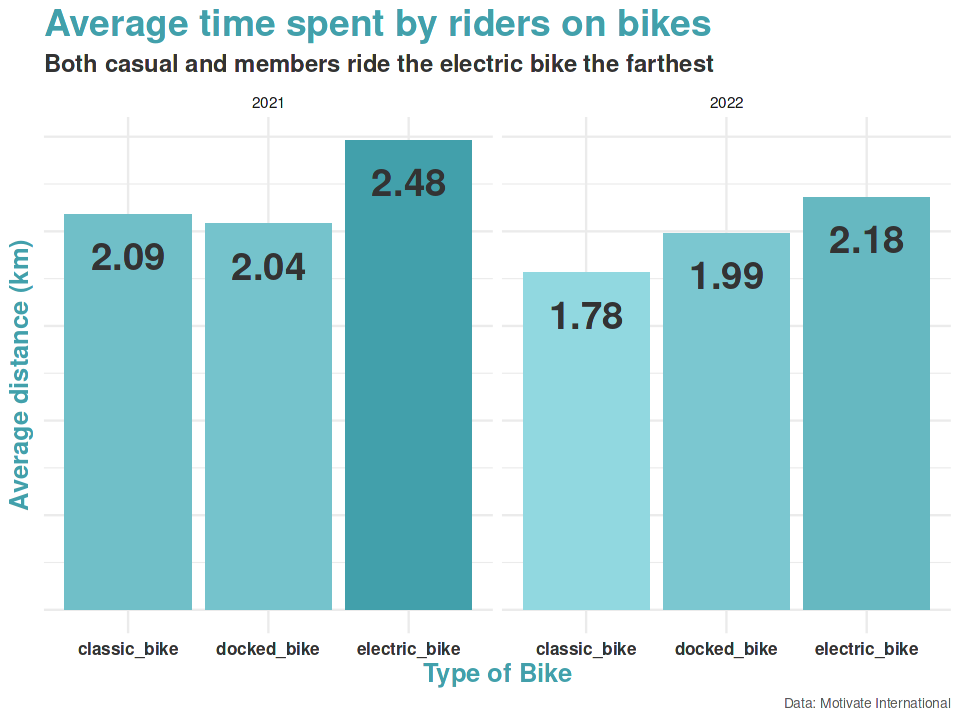

In [25]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(riders_dist_biketypes, aes(x = bike, y = avg_dist, fill = avg_dist)) +
    geom_col() + 
    geom_text(aes(label = avg_dist), vjust = 2, size = 8, color = "grey20", fontface = "bold") +
scale_fill_gradient(high = "#42a0ab", low = "#91d8e0") +
facet_wrap(~user) +
    labs(title = "Average time spent by riders on bikes", subtitle = "Both casual and members ride the electric bike the farthest",
        caption = "Data: Motivate International", x = "Type of Bike", y = "Average distance (km)") +
theme_minimal() +
    theme(plot.title = element_text(size = 22, color = "#42a0ab", face = "bold"), 
    plot.subtitle = element_text(size = 14, color = "grey20", face = "bold"), 
    plot.caption = element_text(size = 8, color = "grey35"),
    axis.title.x = element_text(size = 15, color = "#42a0ab", face = "bold"), 
    axis.title.y = element_text(size = 15, color = "#42a0ab", face = "bold"), 
    axis.text.x = element_text(size = 10, color = "grey20", face = "bold"),
    axis.text.y = element_blank(),
    legend.position = "none")

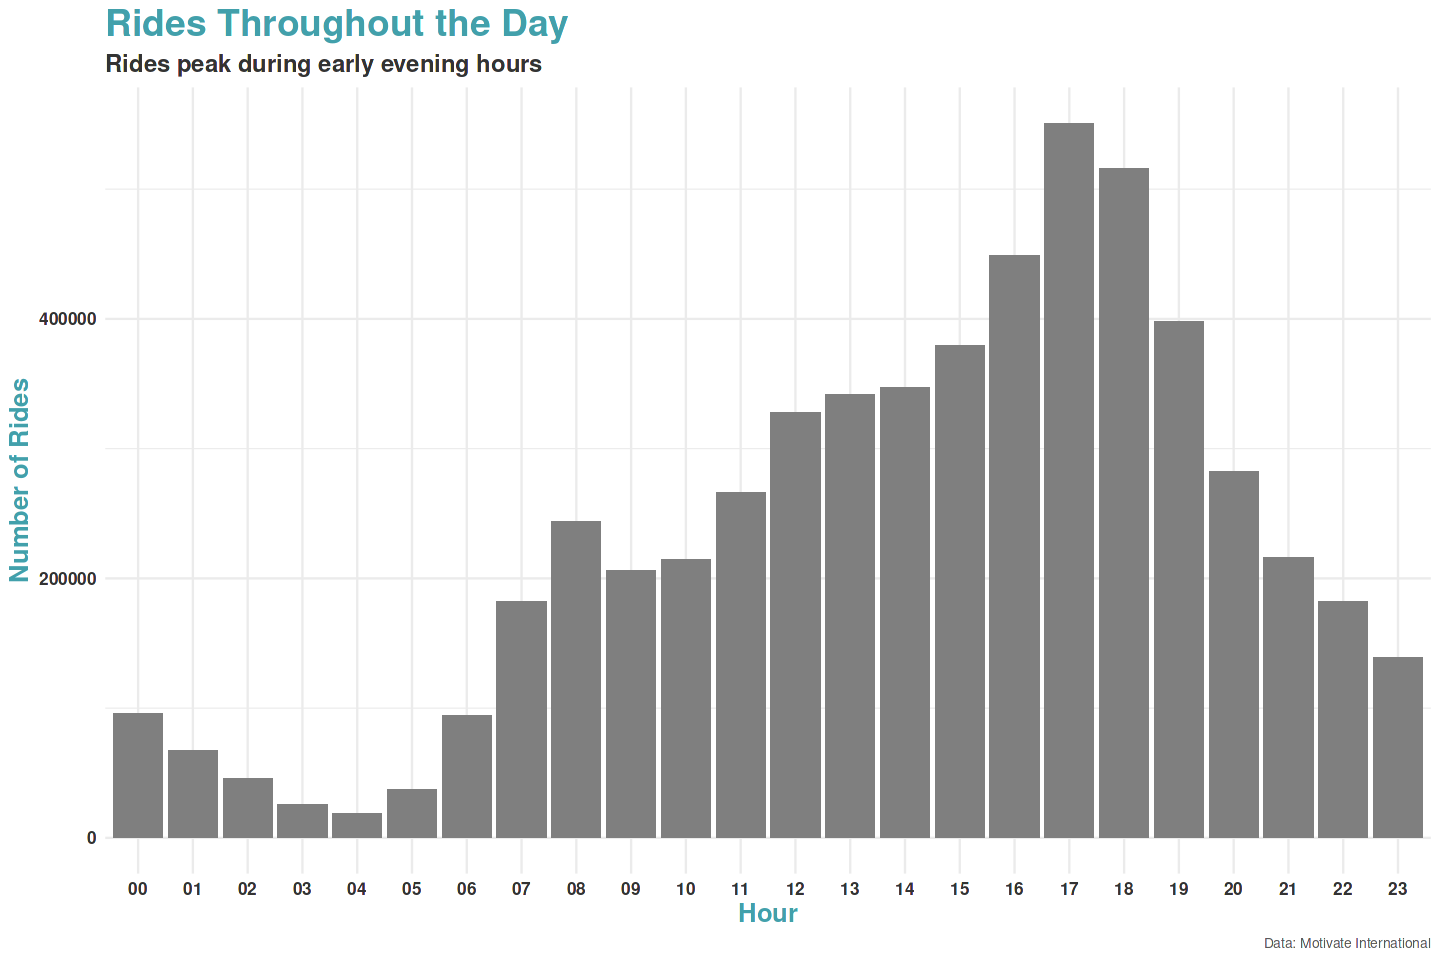

In [26]:
options(repr.plot.width = 12, repr.plot.height = 8)
options(scipen=999)
setwd("/kaggle/working")

ggplot(hour, aes(hour, numberofrides, fill = user, group = user)) +
geom_bar(stat = "identity") +
scale_fill_manual(values = c("#91d8e0", "#42a0ab"), name = "Types of riders", breaks = c("casual", "member"), labels = c("Casual Member", "Annual Member")) +
labs(title = "Rides Throughout the Day", subtitle = "Rides peak during early evening hours",
    caption = "Data: Motivate International",
    x = "Hour", y = "Number of Rides") +
theme_minimal() +
theme(plot.title = element_text(size = 22, color = "#42a0ab", face = "bold"), 
    plot.subtitle = element_text(size = 14, color = "grey20", face = "bold"), 
    plot.caption = element_text(size = 8, color = "grey35"),
    legend.title = element_text(size = 16, face = "bold", color = "#42a0ab"),
    legend.text = element_text(size = 14, color = "grey20"),
    axis.title.x = element_text(size = 15, color = "#42a0ab", face = "bold"), 
    axis.title.y = element_text(size = 15, color = "#42a0ab", face = "bold"),
    axis.text.x = element_text(size = 10, color = "grey20", face = "bold"),
    axis.text.y = element_text(size = 10, color = "grey20", face = "bold"))

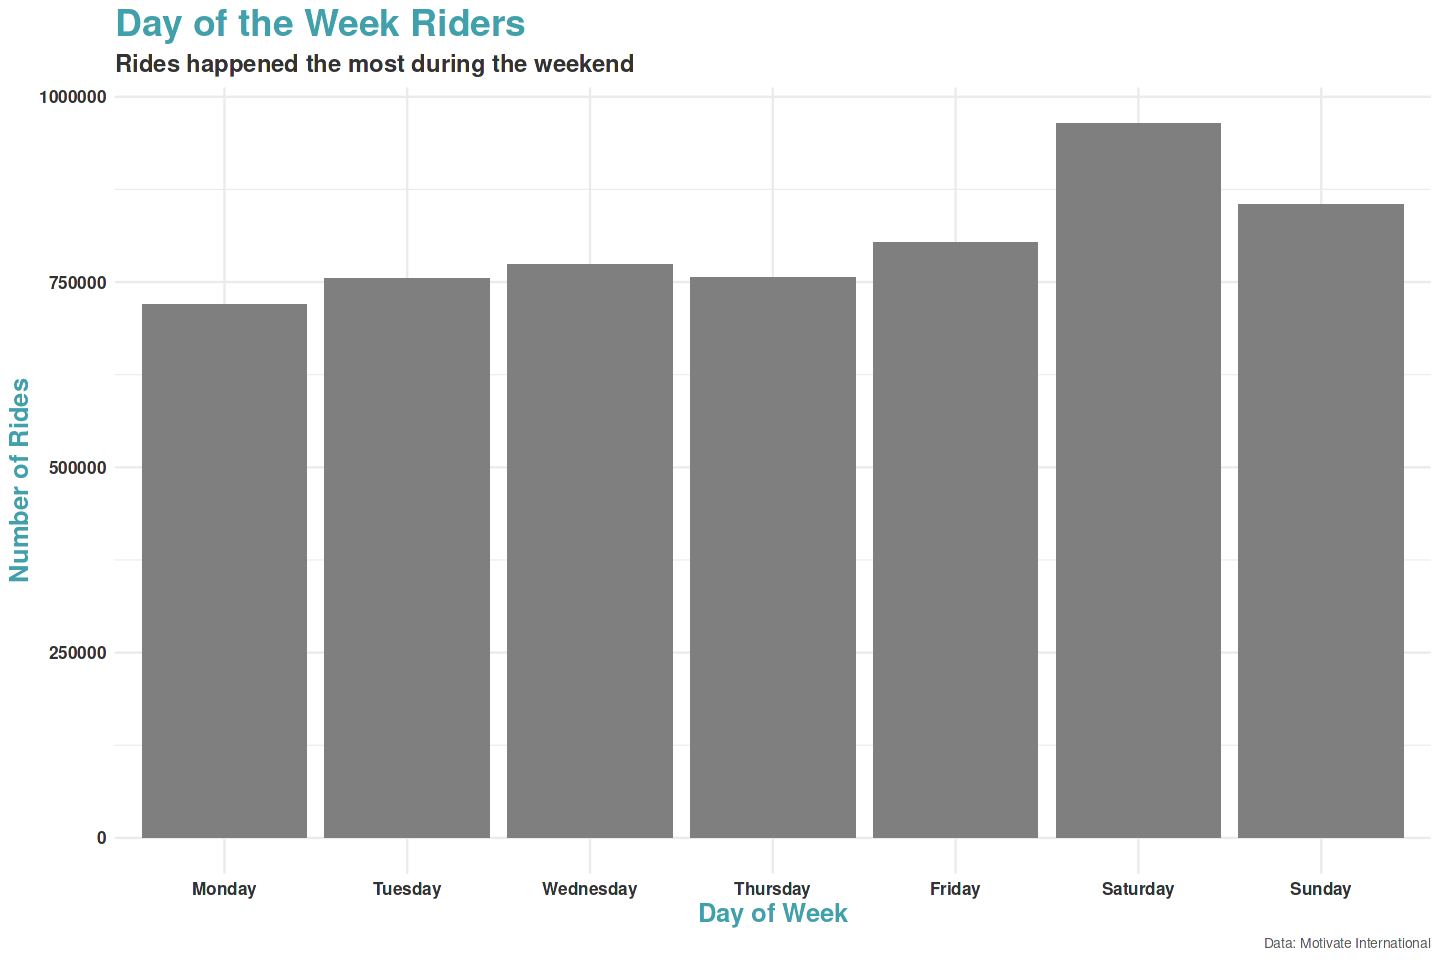

In [27]:
options(repr.plot.width = 12, repr.plot.height = 8)
options(scipen=999)
setwd("/kaggle/working")

ggplot(dayofweek, aes(day_of_week, numberofrides, fill = user, group = user)) +
geom_bar(stat = "identity") +
scale_fill_manual(values = c("#91d8e0", "#42a0ab"), name = "Types of riders", breaks = c("casual", "member"), labels = c("Casual Member", "Annual Member")) +
labs(title = "Day of the Week Riders", subtitle = "Rides happened the most during the weekend",
    caption = "Data: Motivate International",
    x = "Day of Week", y = "Number of Rides") +
theme_minimal() +
theme(plot.title = element_text(size = 22, color = "#42a0ab", face = "bold"), 
    plot.subtitle = element_text(size = 14, color = "grey20", face = "bold"), 
    plot.caption = element_text(size = 8, color = "grey35"),
    legend.title = element_text(size = 16, face = "bold", color = "#42a0ab"),
    legend.text = element_text(size = 14, color = "grey20"),
    axis.title.x = element_text(size = 15, color = "#42a0ab", face = "bold"), 
    axis.title.y = element_text(size = 15, color = "#42a0ab", face = "bold"),
    axis.text.x = element_text(size = 10, color = "grey20", face = "bold"),
    axis.text.y = element_text(size = 10, color = "grey20", face = "bold"))

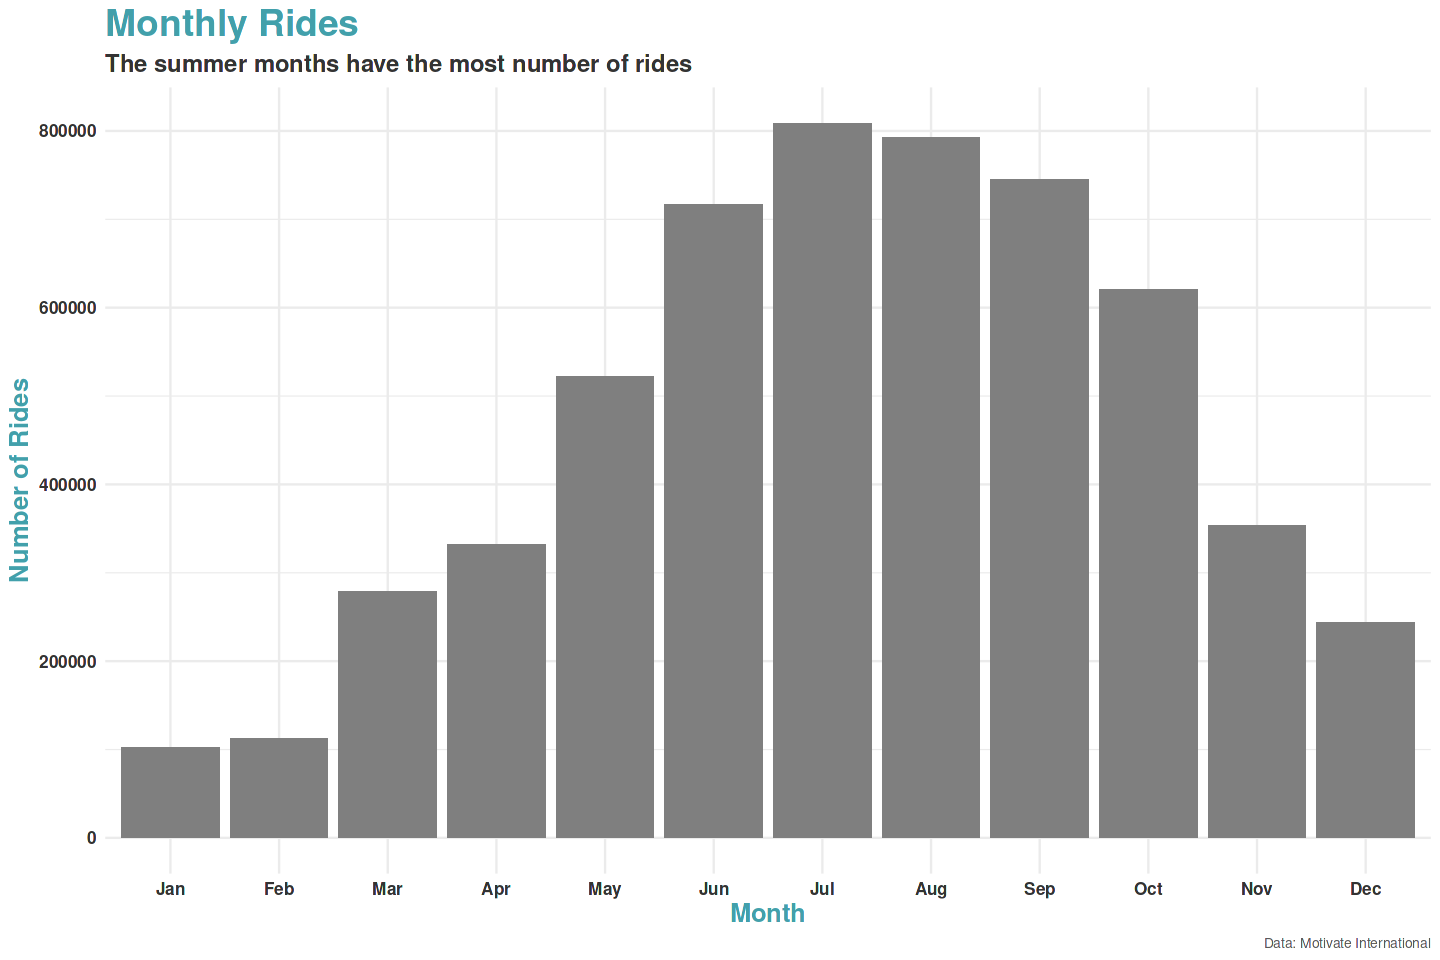

In [28]:
options(repr.plot.width = 12, repr.plot.height = 8)
options(scipen=999)
setwd("/kaggle/working")

ggplot(month, aes(month, numberofrides, fill = user, group = user)) +
geom_bar(stat = "identity") +
scale_fill_manual(values = c("#91d8e0", "#42a0ab"), name = "Types of riders", breaks = c("casual", "member"), labels = c("Casual Member", "Annual Member")) +
labs(title = "Monthly Rides",
    caption = "Data: Motivate International", subtitle = "The summer months have the most number of rides",
    x = "Month", y = "Number of Rides") +
theme_minimal() +
theme(plot.title = element_text(size = 22, color = "#42a0ab", face = "bold"), 
    plot.subtitle = element_text(size = 14, color = "grey20", face = "bold"), 
    plot.caption = element_text(size = 8, color = "grey35"),
    legend.title = element_text(size = 16, face = "bold", color = "#42a0ab"),
    legend.text = element_text(size = 14, color = "grey20"),
    axis.title.x = element_text(size = 15, color = "#42a0ab", face = "bold"), 
    axis.title.y = element_text(size = 15, color = "#42a0ab", face = "bold"),
    axis.text.x = element_text(size = 10, color = "grey20", face = "bold"),
    axis.text.y = element_text(size = 10, color = "grey20", face = "bold"))

## Act

From the analysis performed on the data provided, I have the following recommendations:

1. Have a advertising campaign to casual riders leading into the summer months.

2. Inform the casual riders how much they can save if they were to convert to a member by providing promotions throughout the year such as a free trial or a discount throughout the summer months.

3. Create a reward program to the members and that might help incentavise the casual user to become a member

4. Make docked bikes avaliable in the annual membership

# This was a Case Study for the Google Data Analytics Certificate.